In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler 

# Cancer Inhibitors dataset
Following dataset is coming from https://www.kaggle.com/xiaotawkaggle/inhibitors

On Leho there is an adapted csv of the cdk2.h5 dataset. The adaptations I already did for you was extracting the data out of the .h5 file. Renaming the columns, add in the IDs of each of the compounds (row names) and combine it with the target into a .csv file.

For cdk2, 1890 potential inhibitors are collected from chembl database, in which molecules with IC50 lower than 10 uM are usually considered as inhibitors, otherwise non-inhibitors.

The rownames represent the CHEMBL Id, which can be used to search the CHEMBL database: https://www.ebi.ac.uk/chembl/

The features are split into 3 categories that represent three different sets of molecular fingerprints calculated by RDKIT. For more information: http://www.rdkit.org/docs/GettingStartedInPython.html#topological-fingerprints
* ap: Atom Pairs
* mg: Morgan Fingerprints (Circular Fingerprints)
* tt: Topological Torsions

The actual values represent if a molecular fingerprint is present in a specific molecule or not (1: present, 0: not present)

The target column indicated if the molecule is considered an inhibitor or not.

In [17]:
# Read in the data, because we have row names in our dataset, use pd.read_csv('filename.csv',index_col=0)
data = pd.read_csv('../exercises/data/cdk2.csv',index_col=0)
# Take a look at the first rows of the dataframe
data.head()

,ap_1,ap_2,ap_3,ap_4,ap_5,ap_6,ap_7,ap_8,ap_9,ap_10,...,tt_2031,tt_2032,tt_2033,tt_2034,tt_2035,tt_2036,tt_2037,tt_2038,tt_2039,target
CHEMBL405042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
CHEMBL258805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
CHEMBL318485,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
CHEMBL260417,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
CHEMBL101557,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
# Take a look at the number of rows and columns in the dataframe
print("Rows, columns:",data.shape)


Rows, columns: (1890, 6118)


<Axes: xlabel='target', ylabel='count'>

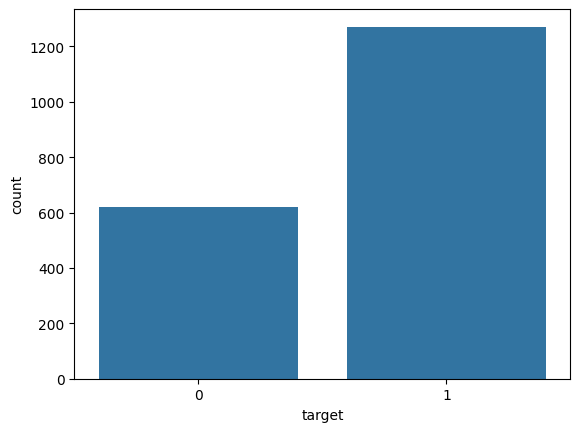

In [14]:
# Plot the counts of the target column using  a seaborn countplot
sns.countplot(data, x="target")

<Axes: xlabel='ap_1', ylabel='count'>

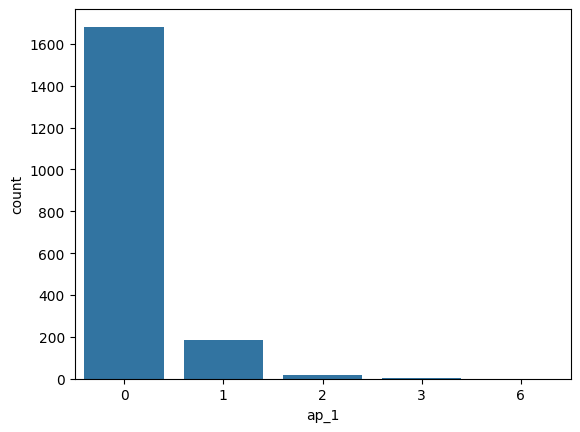

In [15]:
# Plot a countplot of the first feature column (ap_1)
sns.countplot(data, x="ap_1")

**What is noteworthy of the plot above?**



**Notes:**
Due to the amount of columns, a df.describe() will not show you a lot of information.

Pairplots and corrplots would be gigantic and also not very informative due to it being sparse data.

Removing outliers would not be a good idea, since a lot of the values that are different from 0 would already be considered outliers, whilst these are just the informative things.
    

In [16]:
# Split into features and targets
X=data.drop("target",axis=1)
y=data["target"]

In [17]:
# Split into training and test set. Keep +-20% as a test_set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [18]:
# Create a multinomial naive bayes classifier
model = MultinomialNB(alpha=1)

# Fit the training data
model.fit(X_train,y_train)

# Show the score of the test data
print("Test score:",model.score(X_test,y_test))

Test score: 0.7698412698412699


In [19]:
# Predict values for the test set
print("Prediction",X_test.values[0])
print("The actual class is:",y_test.values[0], ". The predicted class is:",model.predict(X_test.values[0].reshape(1,-1)))
# Print a confusion matrix and classification report
y_pred = model.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Prediction [1 0 0 ... 0 1 0]
The actual class is: 1 . The predicted class is: [0]
[[ 90  19]
 [ 68 201]]
              precision    recall  f1-score   support

           0       0.57      0.83      0.67       109
           1       0.91      0.75      0.82       269

    accuracy                           0.77       378
   macro avg       0.74      0.79      0.75       378
weighted avg       0.81      0.77      0.78       378



/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [20]:
# Train a logistic regression model on the data and test it as you did for the naive bayes model
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg_model=LogisticRegression( C=1)
logreg_model.fit(X_train_scaled, y_train)

y_pred_test = logreg_model.predict(X_test_scaled)
y_predict_train = logreg_model.predict(X_train_scaled)

print(f"accuracy on the test set :{logreg_model.score(X_test_scaled, y_test)}")
print(f"accuracy on the training set: {logreg_model.score(X_train_scaled, y_train)}")
print("="*80)

y_pred = logreg_model.predict(X_test_scaled)

print(confusion_matrix(y_test,y_pred))
print("="*80)

print(classification_report(y_test,y_pred))

accuracy on the test set :0.9047619047619048
accuracy on the training set: 0.9973544973544973
[[ 85  24]
 [ 12 257]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       109
           1       0.91      0.96      0.93       269

    accuracy                           0.90       378
   macro avg       0.90      0.87      0.88       378
weighted avg       0.90      0.90      0.90       378



Also try and play with the hyperparameters a bit

## Conclusion
**What can we conclude regarding the metrics of both models**


**What can we conclude regarding the time it takes to train the model?**



# MNIST dataset
MNIST is the "hello world" of AI.

MNIST is a dataset containing a lot of handwritten digits. The goal is to correctly identify the written digit from the image. There is a lot of different sets and subsets available online. The data that we will be using is coming from
https://www.kaggle.com/c/digit-recognizer/data

Each image contains 28x28 pixels => 784 values between 0 (black) and 255 (white)

Some initial code is given as to show you how to display the images

In [5]:
# Read in the dataset
df = pd.read_csv("data/MNIST.csv")

In [6]:
# Take a look at the first rows of the dataset
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='label', ylabel='count'>

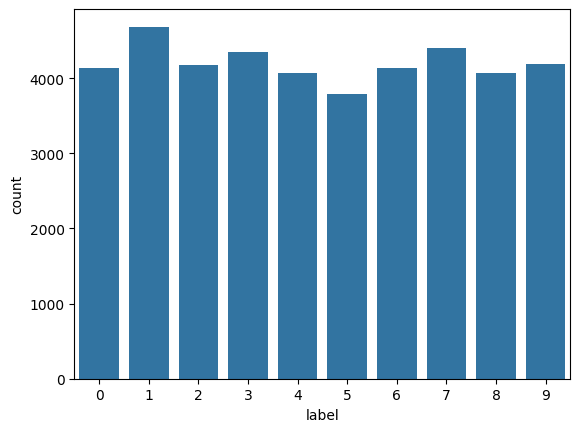

In [7]:
# Countplot of the numbers
sns.countplot(x="label",data=df)

In [8]:
# Split into features and targets
X = df.drop("label",axis=1)
y = df.label

Label: 4


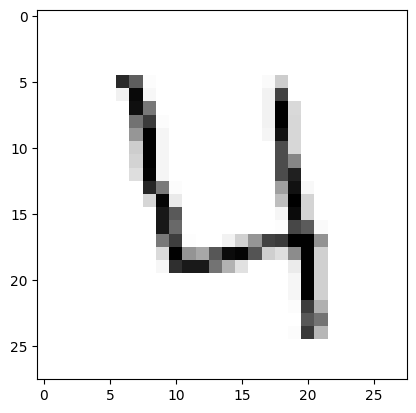

In [9]:
# Change this value to see another sample
row_num_X = 3

# Extract the image from X
single_image= X.iloc[row_num_X,:]  ## Row row_num_X, column all (:)

# Convert the single array of 784 pixels into nested arrays as to creat a 28x28 array
# [p0,p1,p2,p3,...,p784] becomes

# [[p0,p1,p2,p3,...,p27]
#  [p28,p29,p30,    ...]
#  ...
#  [          ..., p783]]
single_image_to_28x28 = single_image.values.reshape(28,28)

# Show the image
plt.imshow(single_image_to_28x28,cmap='Greys')
# Also print the corresponding label
print(f"Label: {y[row_num_X]}")

In [10]:
# Split into training and test set. Keep +-20% as a test_set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [11]:
# Train a multinomial naive bayes model on the data and test it using the test data
# Create an empty multinomial naive bayes model
model = MultinomialNB(alpha=1)

# Fit the model
model.fit(X_train,y_train)

# Print both the score for the training and the test set
print("Train score:",model.score(X_train,y_train))
print("Test score:",model.score(X_test,y_test))

print()



Train score: 0.8282440476190476
Test score: 0.8192857142857143



In [12]:
# Predict values for the test set
print("Prediction",X_test.values[0])
print("The actual class is:",y_test.values[0], ". The predicted class is:",model.predict(X_test.values[0].reshape(1,-1)))
# Print a confusion matrix and classification report
y_pred = model.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))



Prediction [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  33 221 255 231  41   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  71 249 253 253 253 102 118  45   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 129 253 253 230  52  44 253 246 155   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0 127 250 253 229  51   0   3 169
 253 252 155   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 209 253 253  77   0   0   0  46

/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [13]:
# Also try it using a logistic regression model
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg_model=LogisticRegression( C=1)
logreg_model.fit(X_train_scaled, y_train)

y_pred_test = logreg_model.predict(X_test_scaled)
y_predict_train = logreg_model.predict(X_train_scaled)

print(f"accuracy on the test set :{logreg_model.score(X_test_scaled, y_test)}")
print(f"accuracy on the training set: {logreg_model.score(X_train_scaled, y_train)}")
print("="*80)

y_pred = logreg_model.predict(X_test_scaled)

print(confusion_matrix(y_test,y_pred))
print("="*80)

print(classification_report(y_test,y_pred))

/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy on the test set :0.9013095238095238
accuracy on the training set: 0.9560714285714286
[[802   0   5   3   3   8   6   2   5   0]
 [  0 878   9   4   2   3   1   4   5   1]
 [  8  13 736  28  10   8   9   8  15   8]
 [  2   3  29 727   0  37   6  11  22  14]
 [  1   6   9   3 687   2  14   8   5  26]
 [ 12   6  10  29   8 633  22   4  21   8]
 [  7   5  10   2  12  10 808   1   3   0]
 [  4   2  14   3   7   1   1 817   4  45]
 [  4  17  10  21   5  20   9   4 705   8]
 [  7   4   3  16  23  11   0  33  17 778]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       834
           1       0.94      0.97      0.95       907
           2       0.88      0.87      0.88       843
           3       0.87      0.85      0.86       851
           4       0.91      0.90      0.91       761
           5       0.86      0.84      0.85       753
           6       0.92      0.94      0.93       858
           7       0.92      0.91      0.9

Following code let's you draw a number and predict it using your model

The model should be called 'model' or be renamed in the code below

Note that you need packages pillow and tkinter

`conda install pillow tk` or `pip3 install pillow tk` or `sudo dnf install python3-pillow python3-tkinter`

/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


[6]


/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


[7]


/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


[3]


/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


[2]


/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


[2]


/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


[2]


/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


[8]


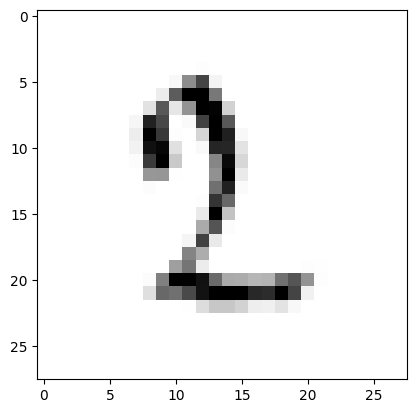

In [14]:
from PIL import ImageTk, Image, ImageDraw, ImageChops
import PIL
from tkinter import *

width = 280  # canvas width
height = 280 # canvas height
center = height//2
white = (255) # canvas back

def predict():
    op2 = ImageChops.invert(output_image)
    op2=op2.resize((28,28),resample=3)
    # Show the image
    plt.imshow(op2,cmap='Greys')
    op2_array = np.asarray(op2).reshape(1,-1)
    print(model.predict(op2_array))
    
def clear():
    plt.close()
    canvas.delete("all")
    draw.rectangle((0,0,width,height),fill=255)
    
def paint(event):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    canvas.create_oval(x1, y1, x2, y2, fill="black",width=25)
    draw.line([x1, y1, x2, y2],fill="black",width=25)

master = Tk()

# create a tkinter canvas to draw on
canvas = Canvas(master, width=width, height=height, bg='white')
canvas.pack()

# create an empty PIL image and draw object to draw on
output_image = PIL.Image.new("L", (width, height), white)
draw = ImageDraw.Draw(output_image)
canvas.pack(expand=YES, fill=BOTH)
canvas.bind("<B1-Motion>", paint)

# add a button to save the image
button=Button(text="predict",command=predict)
button.pack()
button=Button(text="clear",command=clear)
button.pack()

master.mainloop()

In [15]:
from PIL import ImageChops